In [49]:
import numpy as np
from sklearn import linear_model,datasets
import scipy.misc
from matplotlib import pyplot as plt

class KSVD(object):
    def __init__(self, n_components, max_iter=30, tol=1e-6,
                 n_nonzero_coefs=None):
        """
        稀疏模型Y = DX，Y为样本矩阵，使用KSVD动态更新字典矩阵D和稀疏矩阵X
        :param n_components: 字典所含原子个数（字典的列数）
        :param max_iter: 最大迭代次数
        :param tol: 稀疏表示结果的容差
        :param n_nonzero_coefs: 稀疏度
        """
        self.dictionary = None
        self.sparsecode = None
        self.max_iter = max_iter
        self.tol = tol
        self.n_components = n_components
        self.n_nonzero_coefs = n_nonzero_coefs

    def _initialize(self, y):
        """
        初始化字典矩阵
        """
       # u, s, v = np.linalg.svd(y)
       # self.dictionary = u[:, :self.n_components]
        self.dictionary = y[:, :self.n_components]

    def _update_dict(self, y, d, x):
        """
        使用KSVD更新字典的过程
        """
        for i in range(self.n_components):
            index = np.nonzero(x[i, :])[0]
            if len(index) == 0:
                continue

            d[:, i] = 0
            r = (y - np.dot(d, x))[:, index]
            u, s, v = np.linalg.svd(r, full_matrices=False)
            d[:, i] = u[:, 0].T
            x[i, index] = s[0] * v[0, :]
        return d, x

    def fit(self, y):
        """
        KSVD迭代过程
        """
        self._initialize(y)
        for i in range(self.max_iter):
            x = omp(y,self.dictionary,3)
            #x = linear_model.orthogonal_mp(self.dictionary, y, n_nonzero_coefs=self.n_nonzero_coefs)
            e = np.linalg.norm(y - np.dot(self.dictionary, x))
            if e < self.tol:
                break
            self._update_dict(y, self.dictionary, x)
        self.sparsecode = omp(y,self.dictionary,3)
        #self.sparsecode = linear_model.orthogonal_mp(self.dictionary, y, n_nonzero_coefs=self.n_nonzero_coefs)
        return self.dictionary, self.sparsecode

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


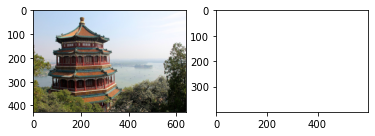

In [21]:
china_imgin = datasets.load_sample_image('china.jpg')
china_reimg2 = np.zeros([400,600,3])
for i in range(3):
    china_img = china_imgin[:,:,i]
    china_img = china_img[:400,:600]
    n = 0
    china_reimg = np.zeros([25,9600])
    for r in range(80):
        for c in range(120):
            china_reimg[:,n] = china_img[5*r:5*r+5,5*c:5*c+5].flatten()
            n+=1

    ksvd = KSVD(10)
    dictionary, sparsecode = ksvd.fit(china_reimg)
    x = dictionary.dot(sparsecode)
    n=0
    china_reimg1 = np.zeros([400,600])
    for r in range(80):
        for c in range(120):
            china_reimg1[5*r:5*r+5,5*c:5*c+5] = x[:,n].reshape([5,5])
            n+=1
    china_reimg2[:,:,i] = china_reimg1

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(china_imgin)
plt.subplot(1, 2, 2)
plt.imshow(china_reimg2)
plt.show()

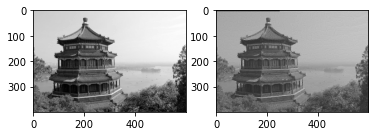

In [52]:
china_img = datasets.load_sample_image('china.jpg')
china_img = (0.2989 * china_img[:,:,0] + 0.5870 * china_img[:,:,1] + 0.1140 * china_img[:,:,2]).astype(int)
china_img = china_img[:400,:600]
n = 0
china_reimg = np.zeros([25,9600])
for r in range(80):
    for c in range(120):
        china_reimg[:,n] = china_img[5*r:5*r+5,5*c:5*c+5].flatten()
        n+=1

ksvd = KSVD(50)
dictionary, sparsecode = ksvd.fit(china_reimg)
x = dictionary.dot(sparsecode)
n=0
china_reimg1 = np.zeros([400,600])
for r in range(80):
    for c in range(120):
        china_reimg1[5*r:5*r+5,5*c:5*c+5] = x[:,n].reshape([5,5])
        n+=1
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(china_img,'gray')
plt.subplot(1, 2, 2)
plt.imshow(china_reimg1,'gray')
plt.show()

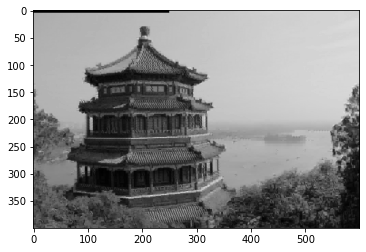

In [137]:
plt.imshow(china_reimg1,'gray')

In [150]:
china_reimg1

array([[-4.56849847e-01, -1.37327568e-01,  8.28099569e-02, ...,
         2.45845678e+02,  2.45179973e+02,  2.46621330e+02],
       [-5.25462077e-01, -2.33998838e-02,  2.77443496e-01, ...,
         2.51231526e+02,  2.52628838e+02,  2.52401005e+02],
       [-3.67233974e-01,  6.02206085e-02,  2.85546678e-01, ...,
         2.39265539e+02,  2.39269840e+02,  2.40548942e+02],
       ...,
       [ 4.90961609e+01,  1.06620515e+02,  1.45501295e+02, ...,
         6.49333031e+00,  5.99806116e+00,  4.44746040e+00],
       [ 8.18388319e+01,  1.23662627e+02,  1.36347192e+02, ...,
         5.80331475e+00,  7.65691639e+00,  9.58096790e+00],
       [ 1.19727039e+02,  1.37336208e+02,  1.33239515e+02, ...,
         5.14185687e+00,  5.80907919e+00,  9.67287771e+00]])

In [51]:
dictionary.dot(sparsecode[:,0])

array([195.5988681 , 196.1857322 , 196.85197421, 196.73806504,
       196.45086212, 195.63661976, 196.10356535, 196.7375155 ,
       197.08856353, 196.54672593, 195.87183478, 196.18369209,
       196.51992506, 197.0500432 , 196.82205526, 195.31020017,
       195.89995422, 196.09641426, 196.61746489, 196.41927184,
       194.64597367, 195.01480102, 195.37493256, 195.66075516,
       195.51204027])

In [51]:
def omp(y,dictionary,sparsity=1):
    sparsecodetest = np.zeros([dictionary.shape[1],y.shape[1]])
    for i in range(y.shape[1]):
        res = y[:,i]
        for n in range(sparsity):
            maxindex = (np.abs(res.dot(dictionary))).argmax()
            a = np.linalg.pinv(dictionary[:,maxindex].reshape(25, 1))
            sparsecodetest[maxindex,i] = np.dot(a,y[:,i])
            res = y[:,i] - dictionary.dot(sparsecodetest[:,i])
    return sparsecodetest

In [122]:
a = omp(china_reimg,dictionary,3)

In [123]:
i = 0
a[:,i],sparsecode[:,i]

(array([-9.80592768e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.55734262e-01, -1.25614967e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]),
 array([-980.59276771,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ]))

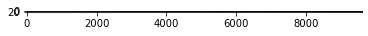

In [129]:
plt.imshow(china_reimg1,'gray')
x = np.dot(dictionary,a)
china_reimg1 = np.zeros([400,600])
for r in range(80):
    for c in range(120):
        china_reimg1[5*r:5*r+5,5*c:5*c+5] = x[:,n].reshape([5,5])
        n+=1

In [126]:
a.shape

(10, 9600)

In [15]:
class OMP:
    """
    OMP算法封装成类
    """

    def __init__(self, dictionary, Y, k):
        """
        :param dictionary 字典
        :param Y 观测向量
        :param k 信号的稀疏度
        """
        self.dictionary = dictionary
        self.Y = Y
        self.T = k

    def start(self):
        """
        开始算法
        """
        if len(self.dictionary.shape) > 1:
            K = self.dictionary.shape[1]
        else:
            K = 1
            self.dictionary = self.dictionary.reshape((self.dictionary.shape[0], 1))
        if len(self.Y.shape) > 1:
            N = self.Y.shape[1]
        else:
            N = 1
            self.Y = self.Y.reshape((self.Y.shape[0], 1))
        X = np.zeros((K, N))
        for i in range(N):
            y = self.Y[:, i]
            # 初始化残差为y
            r = y
            index = []
            A = None
            x = None
            # 迭代
            for k in range(self.T):
                proj = np.fabs(np.dot(self.dictionary.T, r))
                # 最大投影系数对应的位置
                pos = np.argmax(proj)
                index.append(pos)
                # 更新索引集
                if k == 0:
                    A = self.dictionary[:, pos].reshape(self.Y.shape[0], 1)
                else:
                    A = np.concatenate((A, self.dictionary[:, pos].reshape(self.Y.shape[0], 1)), axis=1)
                # 最小二乘求得近似解
                x = np.dot(np.linalg.pinv(A), y)
                # 更新残差
                r = y - np.dot(A, x)

            tmp = np.zeros((K, 1))
            tmp[index] = x.reshape((self.T, 1))
            tmp = np.array(tmp).reshape(K)
            X[:, i] = tmp
        return X

In [24]:
omp = OMP(dicti,im_ascent,50)

In [25]:
x = omp.start()

In [26]:
x

array([[-2406.8624223 , -2411.57394235, -2414.62692929, ...,
        -2352.15806808, -2342.24615899, -2337.37159726],
       [  615.32224005,   600.20600743,   671.62093661, ...,
         -391.01459313,  -389.0466107 ,  -396.40848141],
       [ -274.6581743 ,  -329.24009521,  -386.660901  , ...,
          383.50968182,   355.34478445,   316.35297877],
       ...,
       [  -82.51890345,   -67.27873221,    14.1249163 , ...,
           -4.16145816,   -64.35683909,   -74.68911912],
       [  -47.56774383,    13.93886514,    18.27823313, ...,
           -3.93940542,   -33.49406294,   -62.48006617],
       [  189.78907576,    59.79615307,  -119.25668733, ...,
            3.61496826,    41.45112295,    92.42928667]])

In [46]:
sparsecode.shape[0]

10

In [1]:
import numpy as np
A = np.array([[1,1,0],[0,1,1],[1,0,1]],dtype=float)

In [2]:
A

array([[1., 1., 0.],
       [0., 1., 1.],
       [1., 0., 1.]])

In [56]:
def orth(data):
    b = np.zeros_like(data)
    for i in range(data.shape[0]):
        b[i,:] = data[i,:]
        for j in range(i):
            b[i,:] -= (np.dot(data[i,:],b[j,:])/np.dot(b[j,:],b[j,:]))*b[j,:]
    for i in range(b.shape[0]):
        b[i] /= (b[i].dot(b[i]))**0.5
    return b

In [48]:
orth(A)

array([[ 0.70710678,  0.70710678,  0.        ],
       [-0.40824829,  0.40824829,  0.81649658],
       [ 0.57735027, -0.57735027,  0.57735027]])

In [53]:
dictionary = china_reimg[:, :50]

In [54]:
dictionary

array([[-0.45684985, -0.21162017, -0.02667812, ..., -0.19992575,
        -0.14453187, -0.21728534],
       [-0.13732757, -0.21251128, -0.05460302, ..., -0.20007411,
        -0.14418764, -0.21147606],
       [ 0.08280996, -0.21927609, -0.05746044, ..., -0.20015643,
        -0.13882841, -0.222362  ],
       ...,
       [ 0.00968526, -0.19231324,  0.42897895, ..., -0.19994221,
        -0.23350266, -0.14724726],
       [ 0.03004618, -0.18401222,  0.29083275, ..., -0.19979441,
        -0.22321073, -0.19033245],
       [ 0.12053789, -0.19693215,  0.20402251, ..., -0.1997035 ,
        -0.22932451, -0.20872729]])

In [58]:
a = orth(dictionary)

In [61]:
a.dot(a.T)

array([[ 1.00000000e+00,  5.52820578e-17, -1.86331170e-16,
         4.60218674e-17,  2.10202053e-16,  2.63489641e-16,
        -6.69861680e-16, -2.62927999e-16, -1.70231593e-15,
         6.60982198e-16, -6.62208911e-16,  7.88307775e-16,
        -9.56758992e-16,  2.03805175e-15, -2.01891173e-15,
         8.11506675e-16, -5.22238109e-16, -3.04390656e-16,
        -8.61260789e-16, -9.15493263e-16,  2.10270166e-15,
         4.12973527e-16, -1.21935300e-15,  2.79309625e-15,
        -1.97323405e-15],
       [ 5.52820578e-17,  1.00000000e+00, -1.11589296e-16,
         9.29567262e-17, -1.76323458e-16, -4.06296475e-17,
        -2.54360933e-17,  2.07906217e-16, -3.93655271e-16,
         4.02642612e-16, -8.34594261e-17,  6.01884997e-17,
        -9.53008745e-17, -5.06356918e-16,  1.51969782e-15,
        -1.64480439e-15,  1.41237803e-15, -4.86372321e-16,
         2.12217553e-16, -1.08508980e-15,  1.44439456e-16,
        -8.91865163e-17,  2.85854429e-16,  3.34583997e-16,
         8.42040904e-17],
    